# Naive Bayes

Naive Bayes is an algorithm that uses probability to classify the data according to Bayes theorem for strong independence of the features. Bayes theorem estimates the probability of an event based on prior conditions. So, overall, we use a set of feature values to estimate a value assuming the same conditions hold true when those features have similar values.

![alt text](https://jamesbishopblog.files.wordpress.com/2017/08/screen-shot-2017-08-10-at-2-39-13-pm.png)

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

https://machinelearningmastery.com/naive-bayes-for-machine-learning/

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/bye.PNG)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/byes1.PNG)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/bye2.PNG)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/fourbye.PNG)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/bye5.PNG)

![alt text](https://raw.githubusercontent.com/praneethmetuku/file/master/bye6.PNG)

# Gaussian Naive Bayes
A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It’s specifically used when the features have continuous values. It’s also assumed that all the features are following a gaussian distribution i.e, normal distribution.

# Example:-1 Diabetes dataset(Gaussian Naive Bayes)

### Step-1 load the import statments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step-2 load the dataset

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/diabetes.csv')

In [4]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
data.isnull().any()

Number of times pregnant        False
Plasma glucose concentration    False
Diastolic blood pressure        False
Triceps skin fold thickness     False
2-Hour serum insulin            False
Body mass index                 False
Diabetes pedigree function      False
Age                             False
Class                           False
dtype: bool

In [6]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [7]:
clas=pd.get_dummies(data['Class'],drop_first=True)
print(clas)
data['class']=clas

     positive
0           1
1           0
2           1
3           0
4           1
5           0
6           1
7           0
8           1
9           1
10          0
11          1
12          0
13          1
14          1
15          1
16          1
17          1
18          0
19          1
20          0
21          0
22          1
23          1
24          1
25          1
26          1
27          0
28          0
29          0
..        ...
738         0
739         1
740         1
741         0
742         0
743         1
744         0
745         0
746         1
747         0
748         1
749         1
750         1
751         0
752         0
753         1
754         1
755         1
756         0
757         1
758         0
759         1
760         0
761         1
762         0
763         0
764         0
765         0
766         1
767         0

[768 rows x 1 columns]


In [8]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class,class
0,6,148,72,35,0,33.6,0.627,50,positive,1
1,1,85,66,29,0,26.6,0.351,31,negative,0
2,8,183,64,0,0,23.3,0.672,32,positive,1
3,1,89,66,23,94,28.1,0.167,21,negative,0
4,0,137,40,35,168,43.1,2.288,33,positive,1


In [17]:
data.drop('Class',axis=1,inplace=True)
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step-3 visualize the dataset

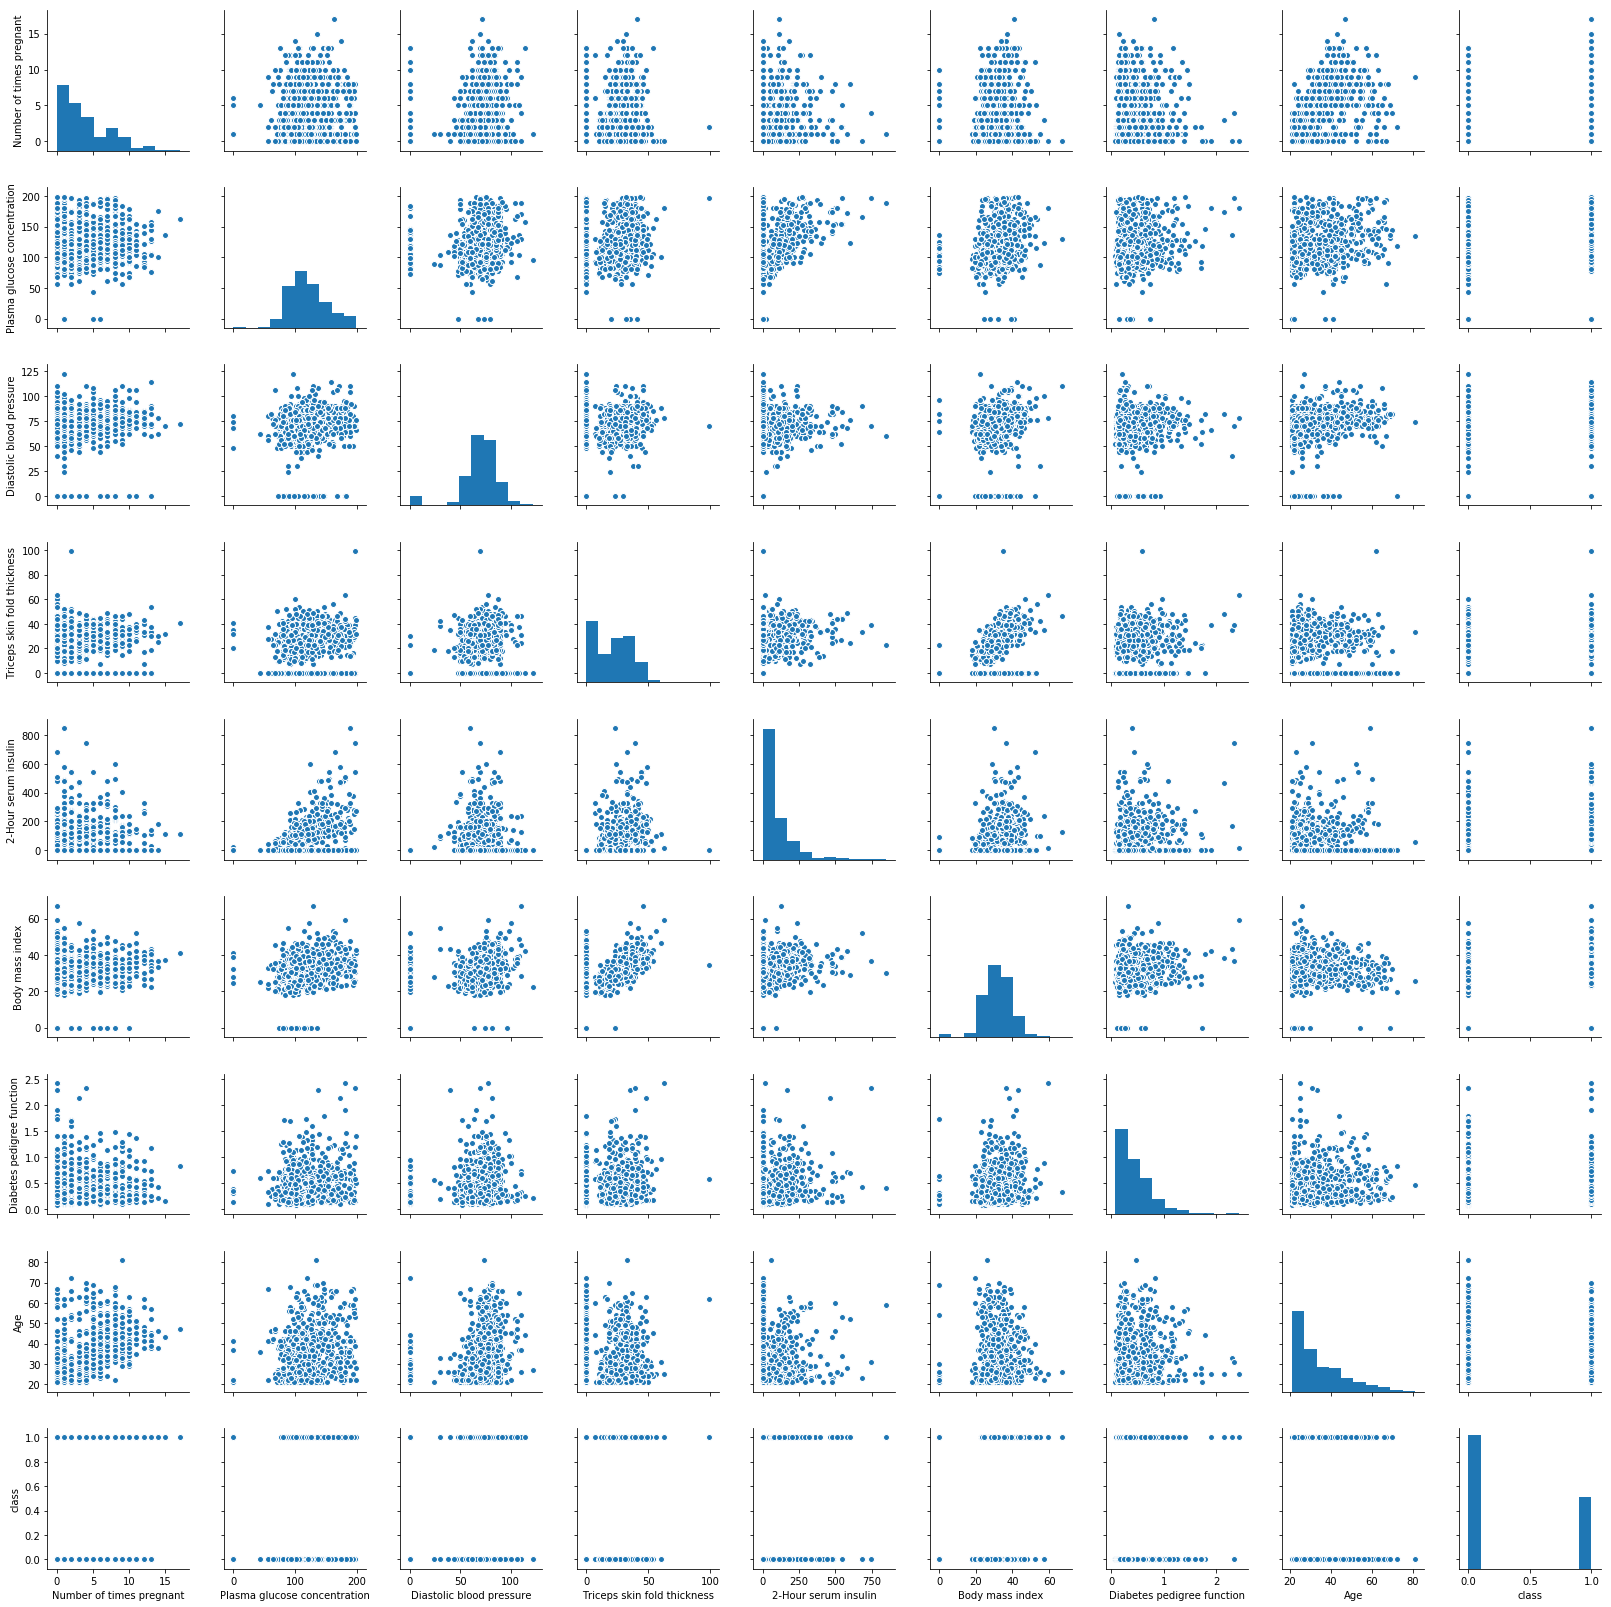

In [18]:
sns.pairplot(data)

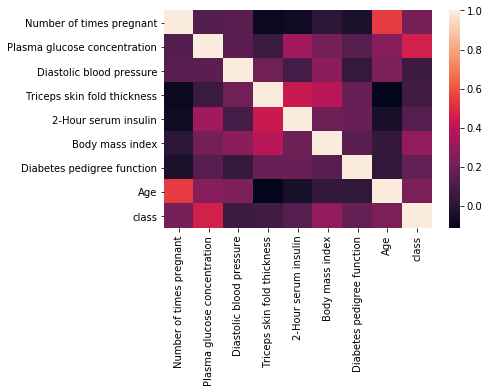

In [19]:
sns.heatmap(data.corr())

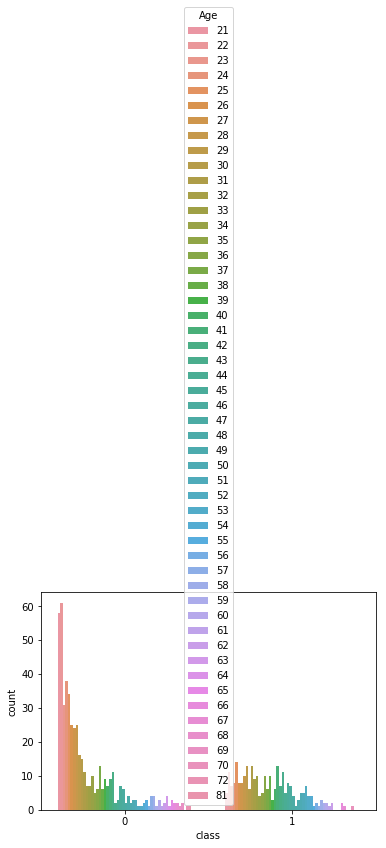

In [20]:
sns.countplot(data['class'],hue=data['Age'])

## Step-4 split the data and feature scaling

In [21]:
from sklearn.model_selection import train_test_split
x=data.drop('class',axis=1)
y=data['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=12)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [23]:
x_test

array([[-1.16473667, -0.16451266,  0.56442411, ...,  1.8923784 ,
        -1.27663444, -0.78312658],
       [ 0.03636137,  1.39960216,  0.14514933, ...,  1.6641541 ,
        -0.01521187, -0.61723464],
       [ 0.03636137,  0.38582404,  0.04033063, ..., -0.10458423,
         2.25858319, -0.94901851],
       ...,
       [ 0.93718489,  1.10995127,  0.8788802 , ..., -0.21869638,
        -1.03081876,  1.12463068],
       [ 1.2374594 , -1.41001149,  0.04033063, ...,  0.48024054,
         0.71576634,  0.46106294],
       [-1.16473667,  0.24099859,  0.9836989 , ..., -0.04752816,
         0.83867419, -0.11955884]])

### Step-5 fit training dataset

In [25]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None)

### Step-6 predict the test dataset

In [27]:
y_predtest=nb.predict(x_test)

In [28]:
y_predtest

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=uint8)

### Step-7 evaluate the model

In [31]:
cm

array([[141,  19],
       [ 40,  56]], dtype=int64)

In [33]:
print(cr)

             precision    recall  f1-score   support

          0       0.78      0.88      0.83       160
          1       0.75      0.58      0.65        96

avg / total       0.77      0.77      0.76       256



In [34]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.76953125


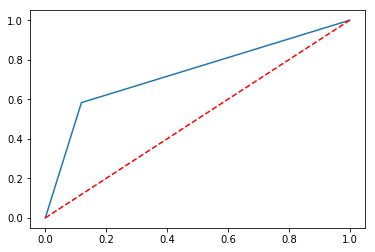

In [35]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predtest)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')

# Example-2 Socai_network_ads.cvs dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
data=pd.read_csv('https://raw.githubusercontent.com/praneethmetuku/file/master/Social_Network_Ads.csv')

In [39]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [40]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [41]:
#for gender catergorical variable
Gender=pd.get_dummies(data['Gender'],drop_first=True)
print(Gender)
data['Gender_cat']=Gender

     Male
0       1
1       1
2       0
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      0
20      1
21      0
22      1
23      0
24      1
25      1
26      1
27      0
28      1
29      1
..    ...
370     0
371     1
372     0
373     1
374     0
375     0
376     0
377     0
378     1
379     0
380     1
381     1
382     0
383     1
384     0
385     1
386     0
387     1
388     1
389     0
390     1
391     1
392     0
393     1
394     0
395     0
396     1
397     0
398     1
399     0

[400 rows x 1 columns]


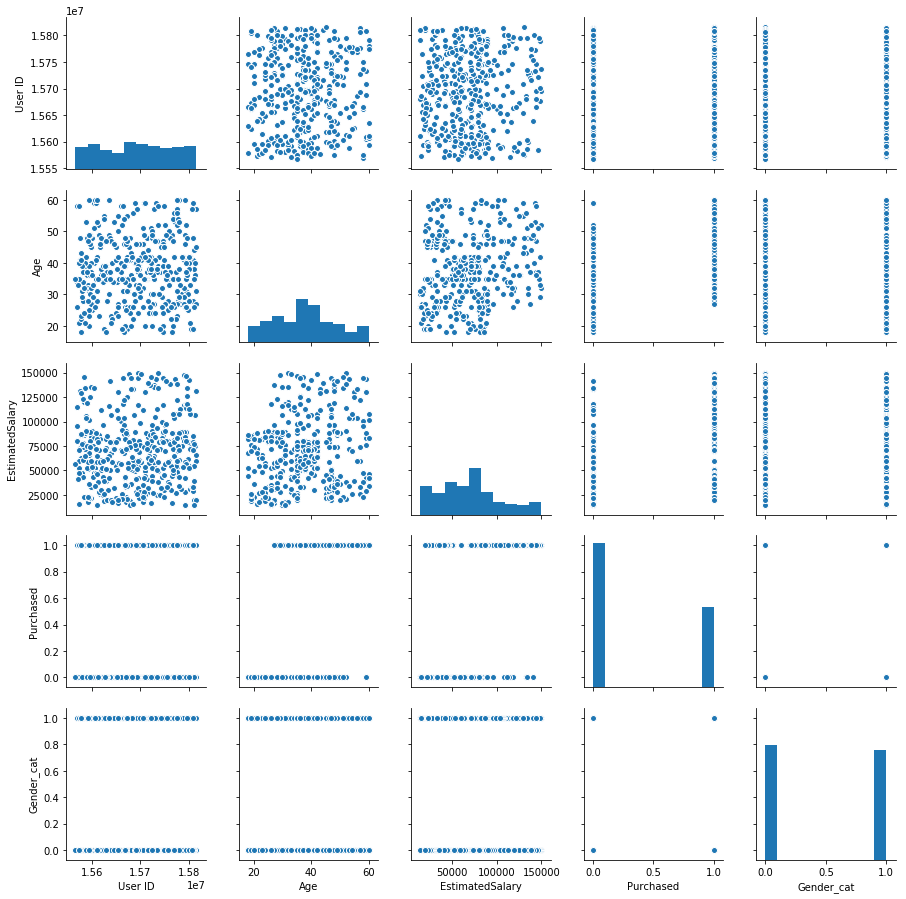

In [42]:
sns.pairplot(data)

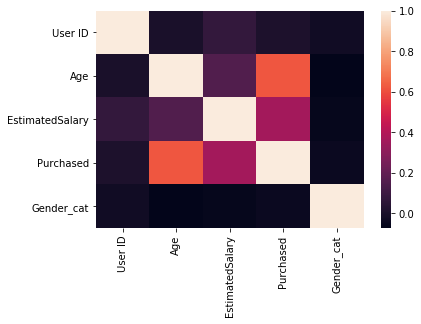

In [43]:
sns.heatmap(data.corr())

In [44]:
x=data[['Age','EstimatedSalary']]
y=data['Purchased']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=21)

In [46]:
x_test

,Age,EstimatedSalary
106,26,35000
9,35,65000
61,25,87000
224,35,60000
37,30,49000
242,50,88000
313,49,141000
52,29,83000
347,54,108000
239,53,143000


In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [48]:
x_train

array([[-1.42141304, -0.50348483],
       [-1.32320632,  0.20000546],
       [-1.2249996 ,  0.22931756],
       [ 0.8373415 ,  1.02074414],
       [-0.733966  ,  0.05344499],
       [ 2.11402884,  0.87418366],
       [-0.63575928,  1.3138651 ],
       [-0.04651897, -0.0344913 ],
       [ 1.72120197, -0.35692435],
       [ 0.14989447,  1.02074414],
       [-1.12679288, -1.52940818],
       [ 1.9176154 ,  0.66899899],
       [ 0.3463079 , -0.23967597],
       [ 0.24810118, -0.62073321],
       [ 1.81940869, -1.14835093],
       [ 0.73913478,  0.05344499],
       [-0.24293241, -0.53279693],
       [ 2.01582212, -0.88454207],
       [-0.34113913, -1.00179046],
       [ 2.01582212,  2.07597958],
       [-0.63575928,  1.84148282],
       [-0.34113913, -0.44486064],
       [-0.04651897,  1.16730462],
       [-1.42141304,  0.34656594],
       [ 2.11402884,  1.05005624],
       [ 1.03375493,  0.05344499],
       [ 0.3463079 ,  1.05005624],
       [ 0.14989447,  2.04666749],
       [-1.2249996 ,

In [49]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [52]:
y_predtest=nb.predict(x_test)
y_predtest

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
cr=classification_report(y_test,y_predtest)
cm=confusion_matrix(y_test,y_predtest)

In [54]:
cm

array([[85,  8],
       [ 2, 39]], dtype=int64)

In [57]:
print(cr)

             precision    recall  f1-score   support

          0       0.98      0.91      0.94        93
          1       0.83      0.95      0.89        41

avg / total       0.93      0.93      0.93       134



In [58]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_predtest)
print(accuracy_test)

0.9253731343283582


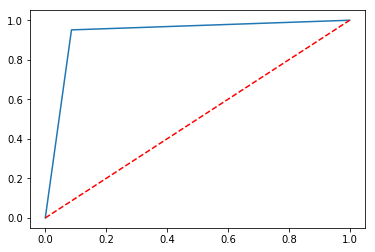

In [59]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predtest)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')